# LINEAR REGRESSION USING NUMPY

In the following notebook we will see the implementation of a machine learning model that uses Linear Regression algorithm built using NumPy from scratch. 

First, we will make the necessary module imports.

In [135]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Now, let us import the dataset. In this example, we will work on a model that predicts the CO<sub>2</sub> emmisions for a vehicle based on factors such as-
- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

**The aim of this project is to make a predictive analysis on CO<sub>2</sub> emmisions of different vehicles as well as train a model using Linear Regression algorithm which can then be used in the future to predict the CO<sub>2</sub> emmisions of a vehicle based on its features. The following dataset contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

In [136]:
df = pd.read_csv("FuelConsumptionCo2.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Data Wrangling 

The first step of the pre-processing is checking whether we need to typecast the data type of any feature/target variable.

In [137]:
df.dtypes

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

Now, let us have a descriptive analysis of our dataset.

In [138]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


For this model, we will only consider a few features. Let's select the features.

In [139]:
df = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
df.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


First, we will check the number of NaN values in the dataframe.

In [140]:
for i in df.columns:
    print(df[i].isnull().value_counts())

False    1067
Name: ENGINESIZE, dtype: int64
False    1067
Name: CYLINDERS, dtype: int64
False    1067
Name: FUELCONSUMPTION_COMB, dtype: int64
False    1067
Name: CO2EMISSIONS, dtype: int64


As we can see that there are no null values in the dataframe, we will move to the second step- conversion of categorical variables to dummy/indicator variables.

In [141]:
for i in ['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']:
    print(df[i].value_counts())

2.0    158
3.6     92
3.5     83
3.0     75
1.6     65
2.4     61
2.5     56
5.3     48
5.0     39
1.8     37
3.7     35
6.2     32
1.4     30
4.0     22
4.4     20
4.7     17
5.7     16
3.8     16
6.0     14
5.5     14
3.4     12
1.5     12
2.7     11
4.8     10
4.3     10
4.6     10
3.2      9
5.4      8
4.2      6
5.2      6
5.6      6
3.3      5
6.4      5
1.2      4
6.7      4
1.0      3
5.9      3
6.6      3
2.1      2
6.8      2
8.4      2
6.5      1
6.3      1
1.3      1
5.8      1
Name: ENGINESIZE, dtype: int64
4     420
6     356
8     252
12     17
10      9
5       9
3       4
Name: CYLINDERS, dtype: int64
8.5     21
9.1     21
9.8     21
16.5    20
8.3     19
        ..
21.2     1
22.5     1
18.1     1
5.9      1
23.0     1
Name: FUELCONSUMPTION_COMB, Length: 148, dtype: int64
294    25
230    22
225    21
209    20
179    19
       ..
437     1
256     1
227     1
213     1
108     1
Name: CO2EMISSIONS, Length: 159, dtype: int64


We see that there are no categorical variables. 

With this, we have completed the process of wrangling/preprocessing out dataset. The next step is visualizing how different features as well as the target variable fare against each other.

## Visualization

First, we will have a look at the correlation of the features and the target variables.

In [142]:
df.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.819482,0.874154
CYLINDERS,0.934011,1.000000,0.776788,0.849685
FUELCONSUMPTION_COMB,0.819482,0.776788,1.000000,0.892129
CO2EMISSIONS,0.874154,0.849685,0.892129,1.000000


Now, let us visualize the plots of different features against the target variable. This will allow us to select the features that will help us train the model. 

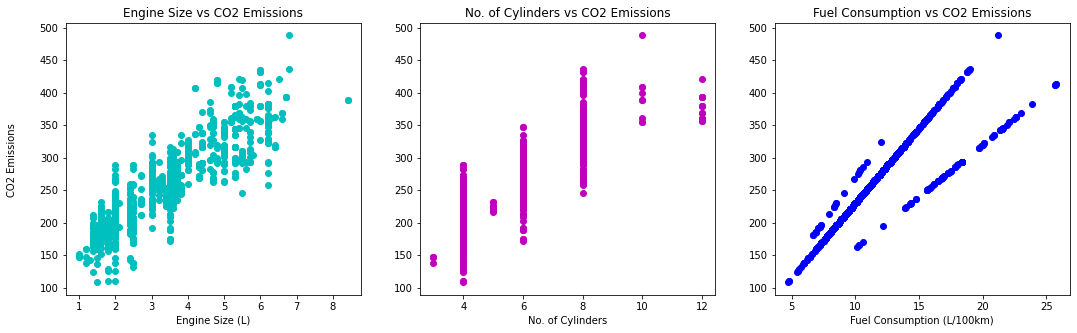

In [143]:
fig, a =  plt.subplots(1,3, figsize = (18, 5))

a[0].scatter(df['ENGINESIZE'], df['CO2EMISSIONS'], color = 'c')
a[0].set_title('Engine Size vs CO2 Emissions')
a[0].set_xlabel('Engine Size (L)')

a[1].scatter(df['CYLINDERS'], df['CO2EMISSIONS'], color = 'm')
a[1].set_title('No. of Cylinders vs CO2 Emissions')
a[1].set_xlabel('No. of Cylinders')

a[2].scatter(df['FUELCONSUMPTION_COMB'], df['CO2EMISSIONS'], color = 'b')
a[2].set_title('Fuel Consumption vs CO2 Emissions')
a[2].set_xlabel('Fuel Consumption (L/100km)')

fig.text(0.08, 0.5, 'CO2 Emissions', va='center', rotation='vertical')
plt.show()

From these plots, we can clearly see that the engine size, fuel consumption and number of cylinders of a vehicle clearly impacts its CO<sub>2</sub>. Therefore we will be using these two features to formulate our Linear Regression model.

## Modelling the Lin_Reg Model

Linear regression uses the following mathematical formula for prediction of a dependant variable using an independant variable.

**y = wx + b**

Here, <li>y- Dependant variable(s)</li>
      <li>x- Dependant varaible(s)</li>
      <li>w- Weight(s) associated with the independent variable(s)</li>
      <li>b- Biases for the given lin-reg equation</li>

The following is the process for developing a linear regression model.
<ol>
    <li>Splitting the data set into training and testing sets. For the sake of simplicity however, we will be skipping this step.</li>
    <li>Assigning random weights and biases to the model and then calculating dependant variable, ŷ on the basis of the random weights and biases.</li>
    <li>Using a loss function to calculate the total information loss, i.e., the total inaccuracy within out model. In our examples, we will be using the Mean Squared Error (<b>MSE</b>) loss function.</li>
    <li>Our next step is to reduce the total MSE of our model. For this, we will be using the Stochastic Gradient Descent (<b>SGD</b>) function, which is one of the most popular optimizer algorithms used in regression models. We will discuss the SGD function in detail while coding the optimizer function.</li>
    <li>We will update the model weights and biases based on our optimizer algorithm, then retrain the model. This is a recurrent process that will keep on repeating until we achieve an optimum model with low information loss.</li>
</ol>    

First, we will select the 3 features that we want to train our model on, i.e., ENGINESIZE, CYLINDERS and FUELCONSUMPTION_COMB.

In [144]:
features = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']].to_numpy() #Converts the dataframe to numpy array 
features

array([[ 2. ,  4. ,  8.5],
       [ 2.4,  4. ,  9.6],
       [ 1.5,  4. ,  5.9],
       ...,
       [ 3. ,  6. , 11.8],
       [ 3.2,  6. , 11.3],
       [ 3.2,  6. , 12.8]])

In [145]:
target = df['CO2EMISSIONS'].to_numpy() #Converts the dataframe to numpy array 
target

array([196, 221, 136, ..., 271, 260, 294], dtype=int64)

Since we have 3 dependant variables, we will have 3 weights. Let's generate an array of 3 small random weights. 

In [146]:
weights = np.random.rand(3) #Generates a numpy array with two small random floats 
weights

array([0.57153744, 0.45363098, 0.26964898])

Since we have a single target variable, we will have just one bias.

In [147]:
b = np.random.rand(2) #Generates a numpy array with two small random float
bias = np.array([b[0] for i in range(len(features))])
bias

array([0.92529174, 0.92529174, 0.92529174, ..., 0.92529174, 0.92529174,
       0.92529174])

Now, we will define our model function that uses weights, biases and dependant variables to calculate ŷ.

In [148]:
def linearRegr(features, weights, bias):
    """Calculates the y_hat predicted values using the given parameters of weights, dependant variables, and biases.
    
    Args- 
        dependant_var: Matrix of dependant variable values
        weights: Matrix/array of weights associated with each dependant variable
        biases: Biases for the model
    Returns-
        Array/matrix of predicted values
    """
    y_hat = weights.dot(features.transpose()) + np.array([bias[0] for i in range(len(features))]) # Takes the value stored in the bias array and makes an array of length of feature matrix for addition
    return y_hat

In [149]:
y_hat = linearRegr(features, weights, b)
y_hat

array([6.17490687, 6.70013573, 5.18805081, ..., 8.54354791, 8.52303091,
       8.92750437])

Now, we will define the MSE function to calculate the total loss of our model. 

In [150]:
def meanSqrError(y, y_hat):
    """Calculates the total mean squared error.
    
    Args- 
        y: Array of actual target values
        y_hat: Array of predicted target values
        
    Returns-
        total mean squared error
    """
    MSE = np.sum((y - y_hat) ** 2) / len(y)
    return MSE

In [151]:
print('Total error- {}'.format(meanSqrError(target, y_hat)))

Total error- 65059.94640485997


Now comes the most important step in the linear regression. Formulating the SGD function. This is a slightly advance topic as compared to all the basic functions we have covered till this point. It requires some knowledge of differencial calculus; partial differentiation in specific. I have tried to explain this in the image below, however if you don't get it, I'd strongly suggest you to be get familiar with the mathematics portion of Machine Learning (Calculus, Staticstics and Probability, Linear Algebra) before proceeding any further.

<img src="SGD.jpg">
<p>
    <a href="https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931">Adarsh Menon-Medium.com</a>
</p>



### Once we have calculated the gradients, we will update the parameters as follows.

* **m = m** x **α D<sub>m</sub>**

* **c = c** x **α D<sub>c</sub>**

Here, 
* E- Total mean squared error
* m- Weights associated with features
* c- Model bias
* y- Array of actual target values
* ŷ- Predicted target values
* D<sub>m</sub>- Partial derivative of E w.r.t. m
* D<sub>c</sub>- Partial derivative of E w.r.t. c
* α- Learning rate, i.e., size of the step that the optimizer function takes.

Once we have the new updated values of the weights and biases, we will calculate the loss again. We will repeat the process for **n** epochs, i.e., number of cycles and plot the loss values after each epoch. To keep the code clean, I will create a separate function for calculation of gradients.

In [152]:
def gradient(target, features, weights, bias):
    """Returns the gradient(slopes) for weights and biases
    """  
    m = len(features)
    target_pred = linearRegr(features, weights, bias)
    loss = target - target_pred # y-y_hat
    # Gradient calculation for model bias
    grad_bias = np.array([-2/m * np.sum(loss)])
    
    grad_weights = np.ones(3)
    # Gradient calculation for first feature
    feature_0 = np.array([feature[0] for feature in features])
    grad_weights[0] = -2/m * np.sum(loss * feature_0)
    # Gradient calculation for second feature
    feature_1 = np.array([feature[1] for feature in features])
    grad_weights[1] = -2/m * np.sum(loss * feature_1)
    # Gradient calculation for third feature
    feature_2 = np.array([feature[1] for feature in features])
    grad_weights[2] = -2/m * np.sum(loss * feature_2)
    
    return grad_bias, grad_weights

In [153]:
# def stochGradDes(learning_rate, epochs, target, features, weights, bias):
#     MSE_list = []
#     for i in range(epochs):
#         grad_bias, grad_weights = gradient(target, features, weights, bias)
#         weights -= grad_weights * learning_rate
#         bias -= grad_bias * learning_rate
#         new_pred = linearRegr(features, weights, bias)
#         total_MSE_new = meanSqrError(target, new_pred)
#         MSE_list.append(total_MSE_new)
#     return MSE_list

In [154]:
# loss_list = stochGradDes(0.001, 10000, target, features, weights, bias)

In [155]:
# print(loss_list[0])
# print(min(loss_list))

In [156]:
# loss_list.index(598.9157564255323)

Now, let us modify the SDG function to return the updated weights and biases so we can formulate our final model.

In [157]:
def stochGradDesMODIFIED(learning_rate, epochs, target, features, weights, bias):
    """Performs stochastic gradient descent optimization on the model.
    
    Args-
        learning_rate- Size of the step the function will take during optimization
        epochs- No. of iterations the function will run for on the model
        target- Actual emission values
        features- Matrix of dependent variables
        weights- Weights associated with each feature
        bias- Model bias
    
    Returns-
        return_dict = {'weights': weights, 'bias': bias[0], 'MSE': total_MSE_new, 'MSE_list': MSE_list}
        
    """

    MSE_list = []
    for i in range(epochs):
        grad_bias, grad_weights = gradient(target, features, weights, bias)
        weights -= grad_weights * learning_rate
        bias -= grad_bias * learning_rate
        new_pred = linearRegr(features, weights, bias)
        total_MSE_new = meanSqrError(target, new_pred)
        MSE_list.append(total_MSE_new)
    return_dict = {'weights': weights, 'bias': bias[0], 'MSE': total_MSE_new, 'MSE_list': MSE_list}
    return return_dict

In [158]:
model_val = stochGradDesMODIFIED(0.001, 2000, target, features, weights, bias)

In [159]:
print("Weights- {}\nBias- {}\nMSE- {}".format(model_val['weights'], model_val['bias'], model_val['MSE']))

Weights- [-1.31826139 14.08429804 13.90031603]
Bias- 15.75423048568827
MSE- 683.6219796457102


Finally, we will write the model function.

In [160]:
def LinearRegressionModel(model_val, feature_list):
    """Predicts the CO2 emission values of the vehicle
    
    Args-
        model_val- This is the dictionary returned by the stockGradDesMODIFIED function. Contains model weights and biases
        feature_list- An array of the dependent variables
    Returns-
        co2_emission- Emission predictions for the given set of features
    """
    co2_emission = np.sum(model_val['weights'] * feature_list) + model_val['bias']
    return co2_emission

In [166]:
target_price = 196
feature_list = [2.0, 4, 8.5]
predicted_price = LinearRegressionModel(model_val, feature_list)
print("Predicted CO2 emission- {}".format(predicted_price))

Predicted CO2 emission- 187.60758615102034


The original target value was 196 for the given model. As we can see, our model did a fairly good job at making the prediction, considering this is a model implementation from scratch. You can further improve the model though, by tweaking a few things or maybe running more optimization epochs. However, too much optimization can lead to model overfitting, which is equally bad for the model as overfitting makes the model practically unusable for real world data.

Now, to check the accuracy of our model, we will calculate its r-squared score. The following is the formula for r2 score-
<img src="r2.jpg">


In [162]:
def r2_score(target, prediction):
    """Calculates the r2 score of the model
    
    Args-
        target- Actual values of the target variable
        prediction- Predicted values, calculated using the model
        
    Returns- 
        r2- r-squared score of the model
    """
    r2 = 1- np.sum((target-prediction)**2)/np.sum((target-target.mean())**2)
    return r2

In [169]:
predictions = [LinearRegressionModel(model_val, feature) for feature in features]
print("r-square score- {}".format(r2_score(target, predictions)))

r-square score- 0.8296177957224262


As we can see, our model explains around 82% of variability of the response data around its mean, which is fairly good. however, there is always room for improvement in a Machine Learning model!